# Nivell 1

## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Igual que en los casos anteriores se va a escoger el dataset relacionado con la pluviometría acumulada en la ciudad de Barcelona (LAT (º): 41,41864; LONG (º): 2,12379; ALT (m): 411) entre los años 1786 y 2021. Además, igual que en los casos anteriores se va a eliminar la primera fila al presentar outlaiers en varios meses.

En este primer ejercicio se va a comprobar si uno de los meses sigue una distribución normal. Para escoger el mes más adecuado, primero se va a hacer una exploración gráfica de todos los meses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pluvi = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 5/Barcelona_PPT_m_1786_2021.txt',
                   sep='\t')

In [12]:
print(pluvi.shape)
pluvi.head()

(236, 13)


,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
0,1786,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,6.8,52.1,62.0,57.0,195.8,114.1
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9


In [13]:
pluvi2 = pluvi.iloc[1:,]
pluvi2.head()

,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9
5,1791,9.9,34.7,9.9,31.1,148.8,2.5,1.2,1.2,119.0,89.2,109.1,34.7


In [3]:
names = pluvi.columns[1:]
names

Index(['G', 'F', 'M', 'A', 'M.1', 'J', 'J.1', 'A.1', 'S', 'O', 'N', 'D'], dtype='object')

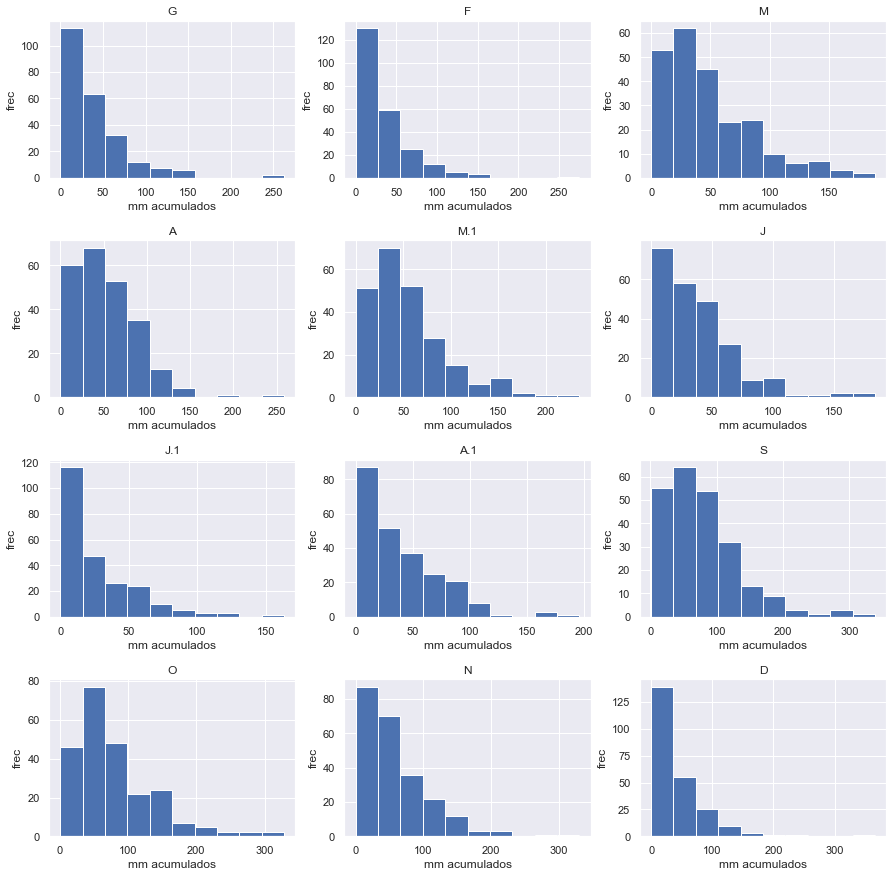

In [19]:
sns.set()
plt.figure(figsize=(15,15))

for i, mes in enumerate(names):
    a = i+1
    plt.subplot(4,3,a)
    plt.hist(pluvi2[mes])
    plt.title(mes)
    plt.xlabel('mm acumulados')
    plt.ylabel('frec')
plt.subplots_adjust(hspace=0.4)    
plt.show()

Todos los gráficos son asimétricos y por lo tanto probablemente no presenten una distribución normal. Como el mes de octubre es el que más recuerda a una distribución normal se va a testar a través de varios test estadísticos si sigue esta distribución

El primer test a realizar es el Shapiro-wealks test, siendo:
* $H_0$: La muestra presenta una distribución Gaussiana
* $H_a$: La muestra no presenta una distribución Gaussiana

In [22]:
#Shapiro test

import scipy.stats as scp

stat, p = scp.shapiro(pluvi2.O)

print('stat', stat, '\np', p)

stat 0.8810348510742188 
p 1.293979788770383e-12


In [23]:
p<0.05

True

Como el valor 'p' es menor a 0.05 se rechaza la hipótesis nula y se confirma que no sigue una distribución normal

Igualmente, se va a confirmar esta sospecha con otros test como el D'Agostino y Anderson-Darling que siguen el mismo planteamiento de hipótesis que el Shapiro-Wealks test

In [25]:
#TEst D'Agostino
stat, p = scp.normaltest(pluvi2.O)
print('stat', stat, '\np', p)

stat 72.78693237027466 
p 1.5650148343536325e-16


El test de Agostino rechaza, al igual que el test anterior, la hipótesis nula

In [26]:
#Test de Anderson-Darling
result = scp.anderson(pluvi2.O)
print(result)

AndersonResult(statistic=7.045605794968424, critical_values=array([0.567, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


En el test de Anderson-Darling para un valor de significación del 0.05 el valor obtenido es de 0.774. Por lo tanto, es mayor de 0.05 y se vuelve a rechazar la hipótesis nula.